### Headaches EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('headaches.csv')

Columns

In [3]:
df.columns

Index(['Count', 'CLASS', 'headache_days', 'durationGroup', 'location',
       'severity', 'characterisation', 'nausea', 'vomitting', 'photophobia',
       'phonophobia', 'aggravation', 'pericranial', 'conjunctival_injection',
       'lacrimation', 'nasal_congestion', 'rhinorrhoea', 'eyelid_oedema',
       'sweating', 'miosis', 'ptosis', 'agitation', 'motor_weakness',
       'speech_disturbance', 'visual_symptomps', 'sensory_symptomps',
       'homonymous_symptomps', 'dysarthria', 'vertigo', 'tinnitus',
       'hypacusia', 'diplopia', 'ataxia', 'decreased_consciousness',
       'nasal_visual_symptomps', 'paraesthesias', 'aura_development',
       'headache_with_aura', 'aura_duration', 'hemiplegic',
       'previous_attacks'],
      dtype='object')

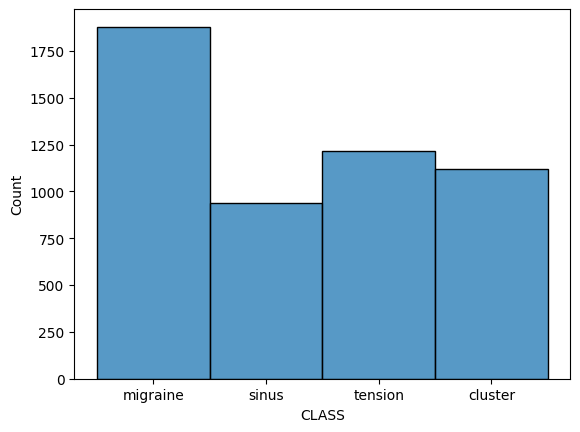

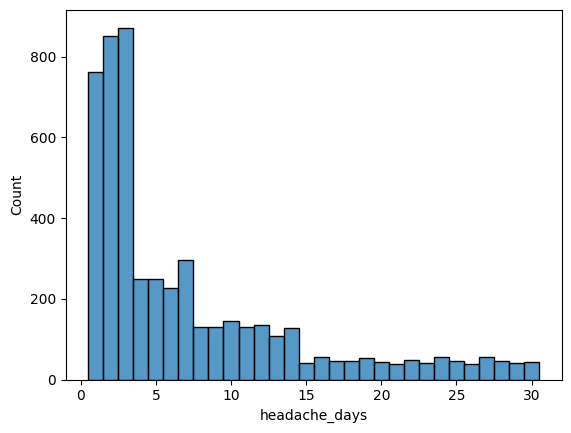

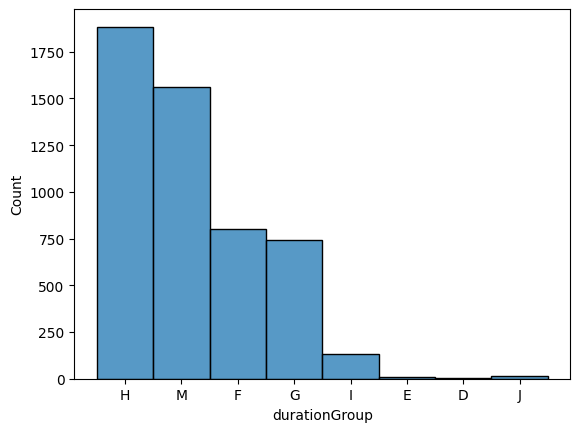

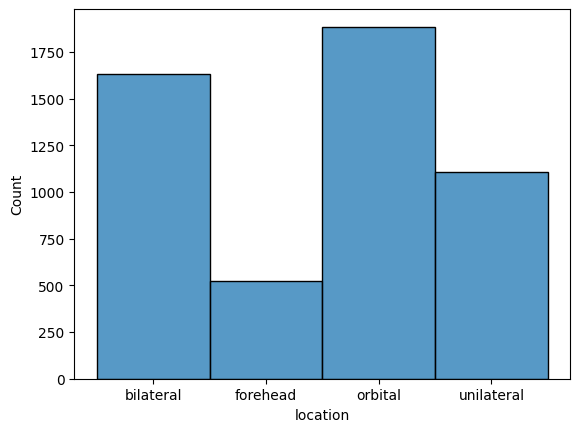

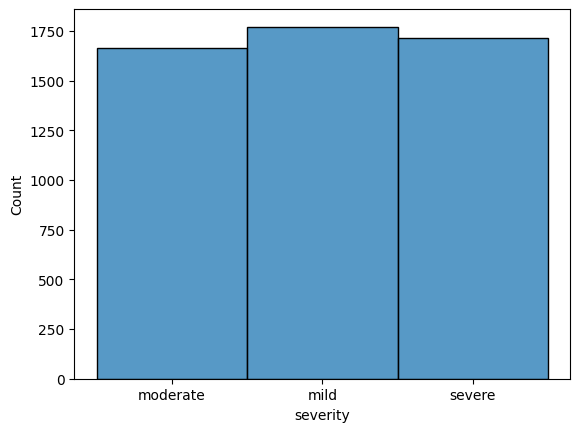

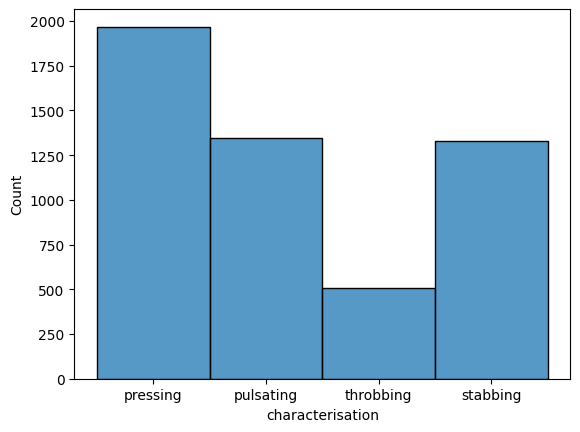

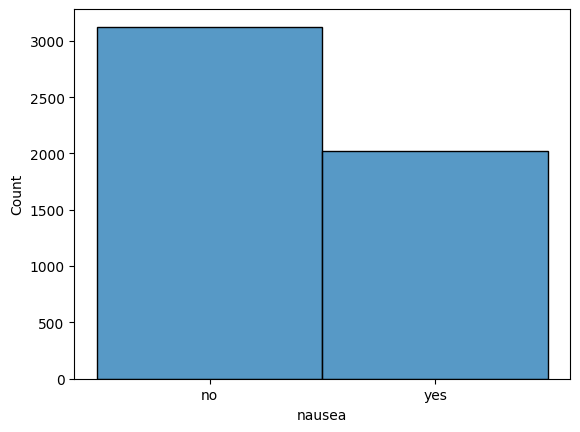

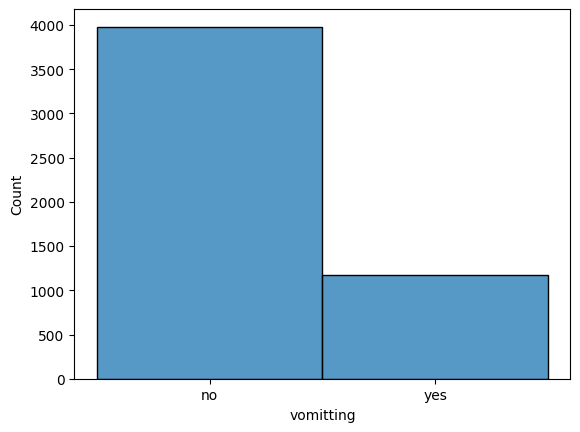

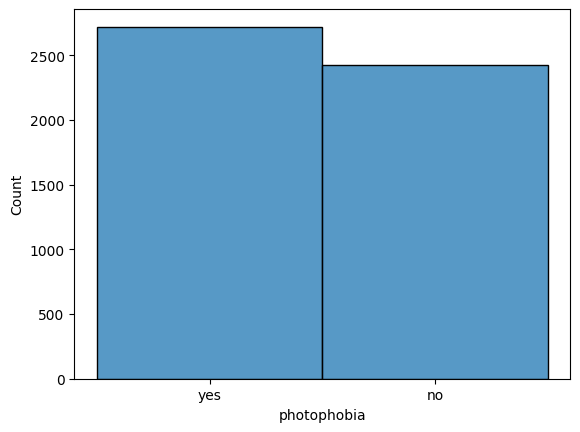

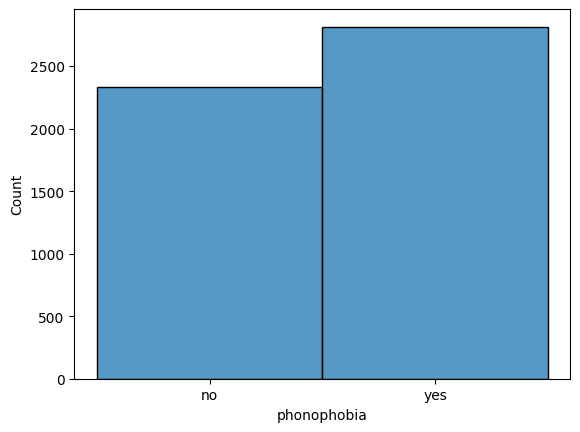

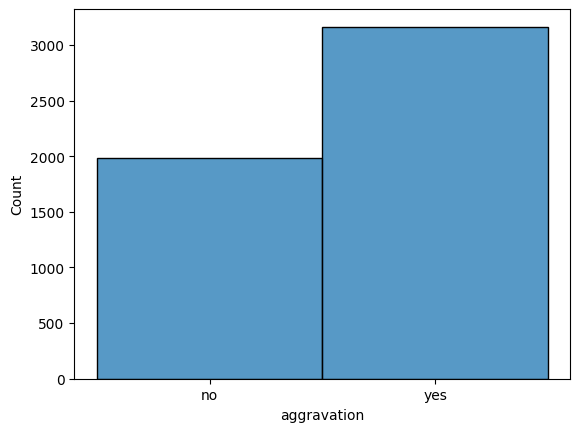

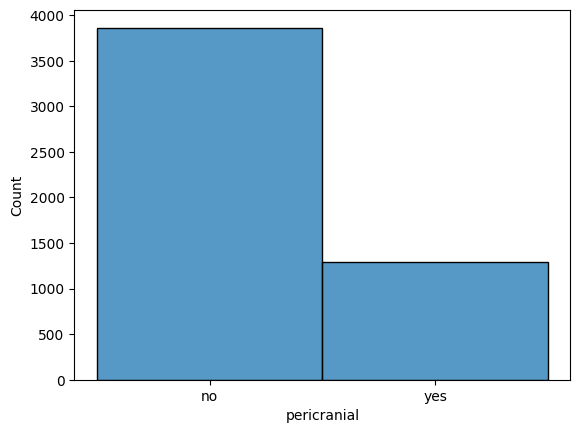

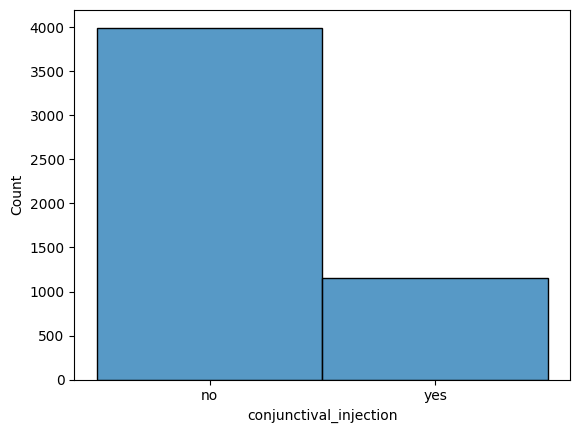

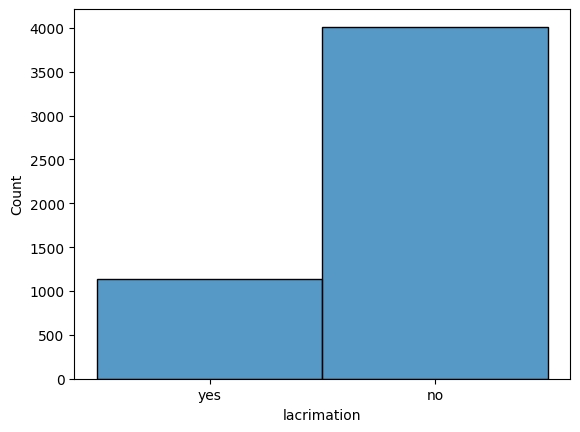

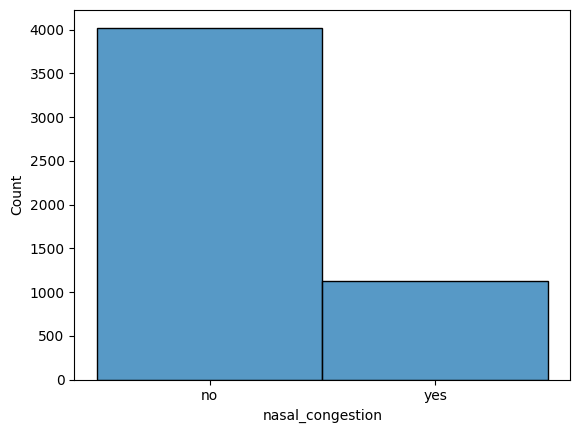

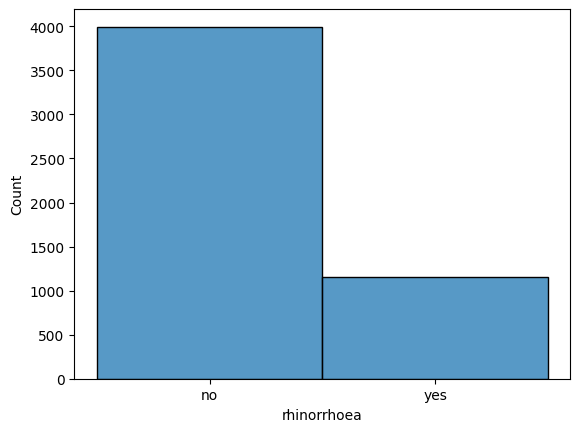

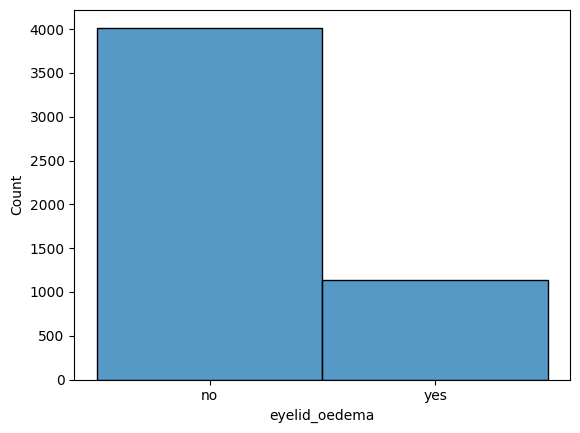

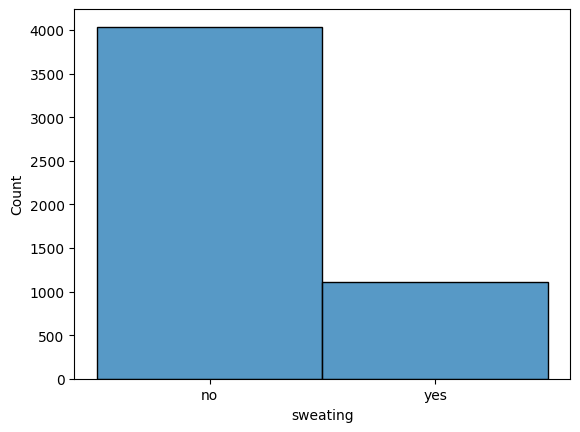

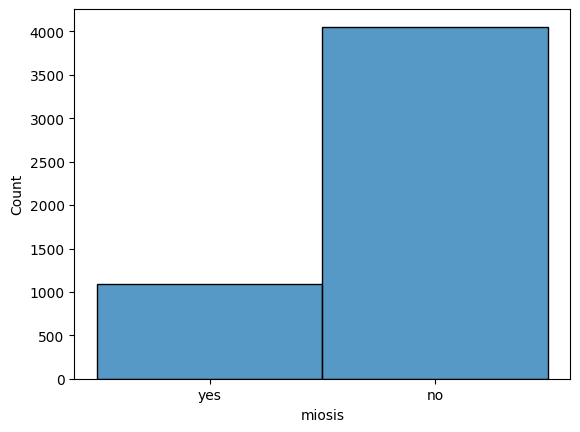

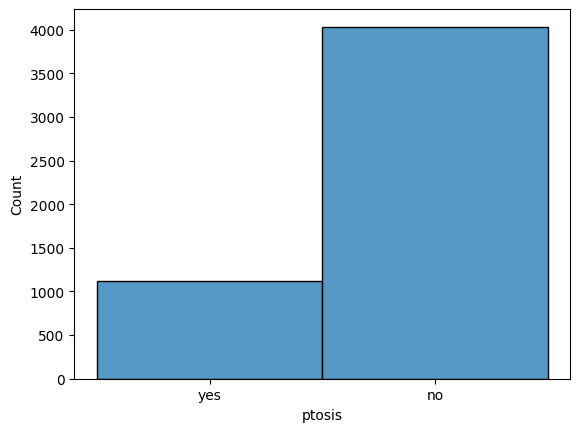

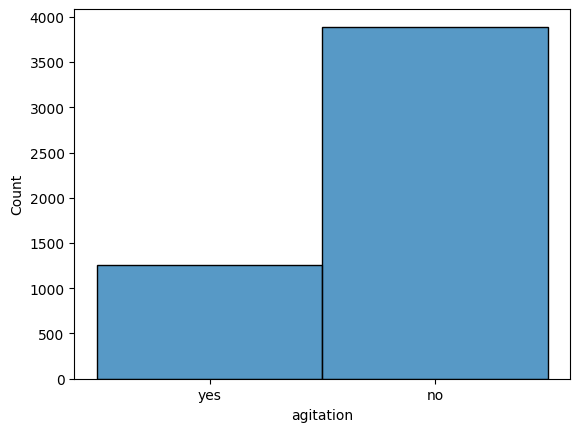

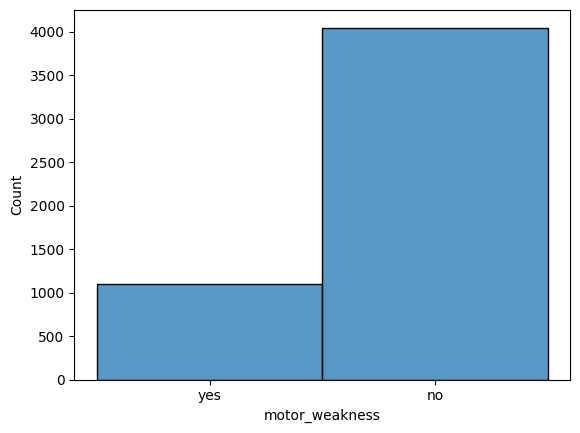

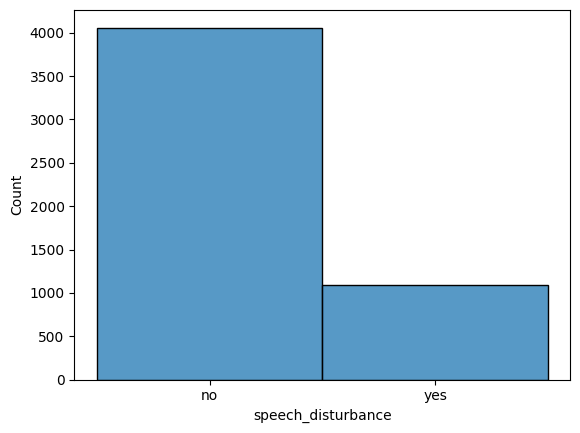

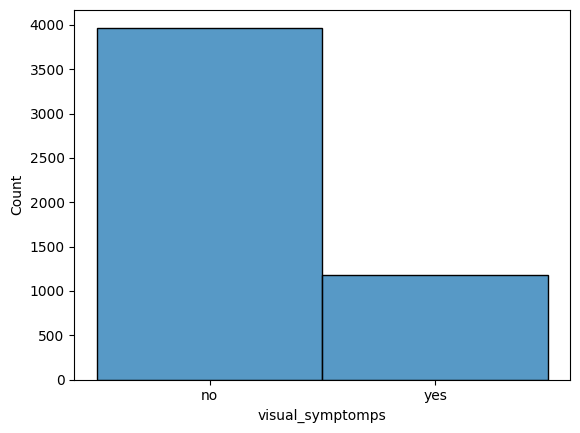

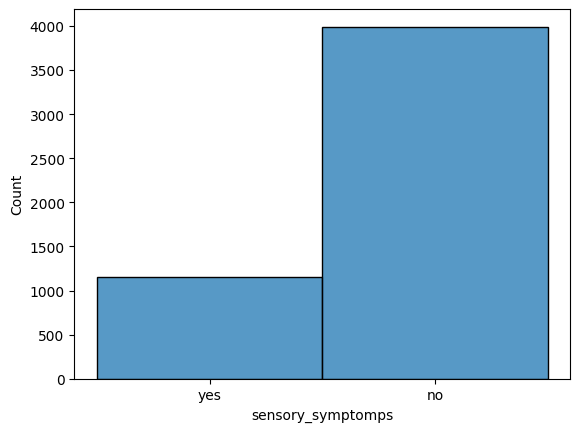

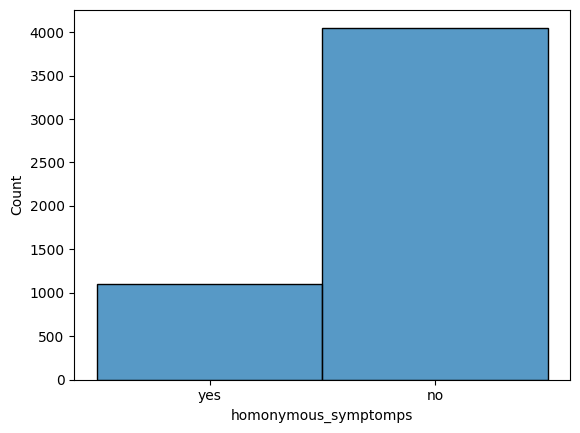

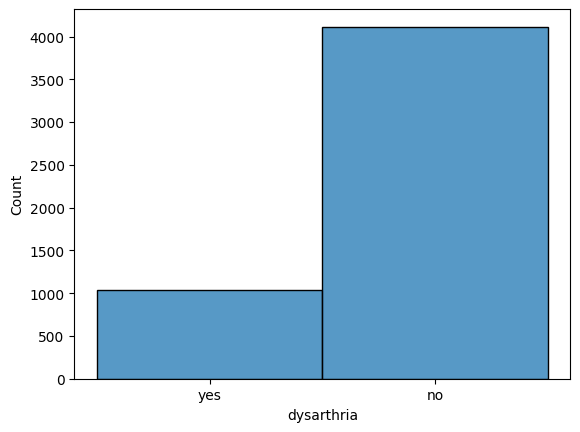

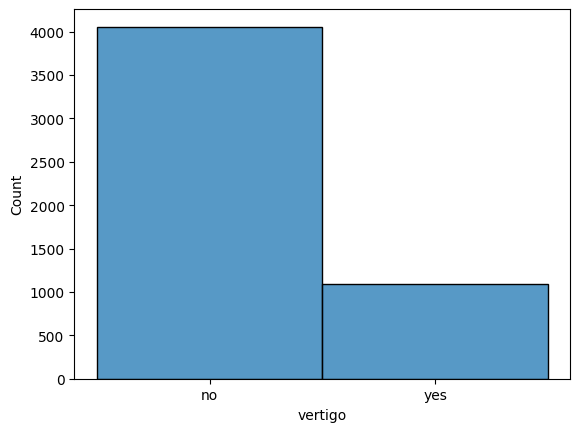

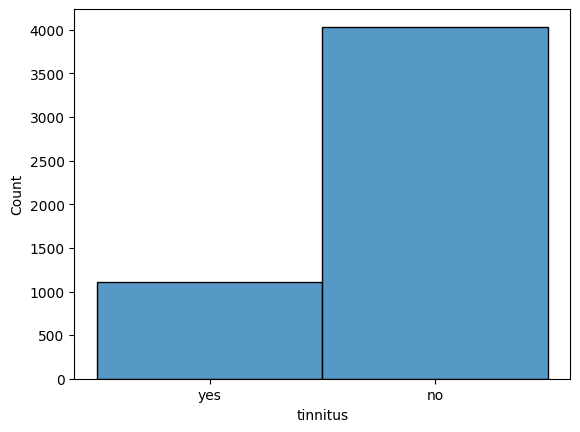

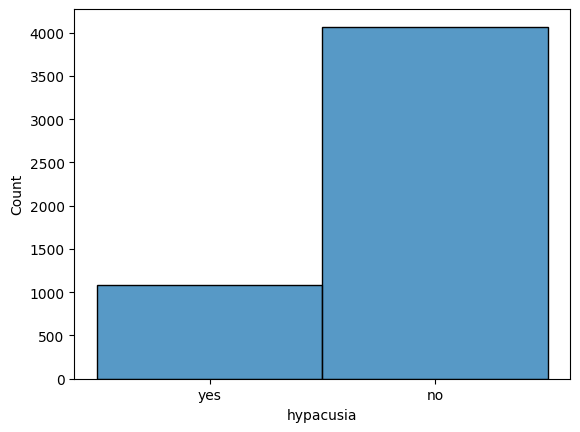

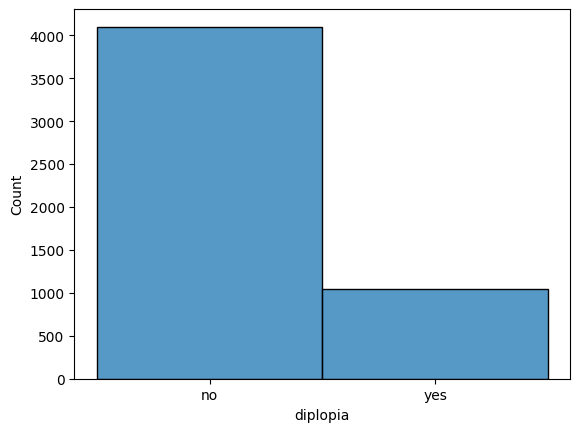

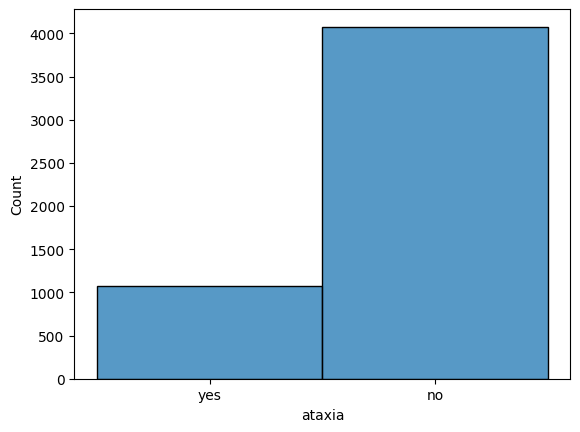

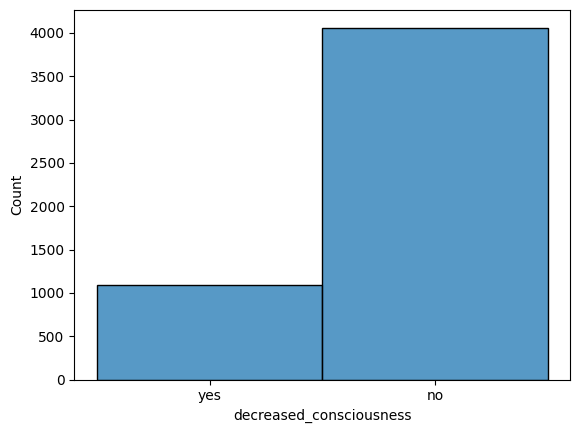

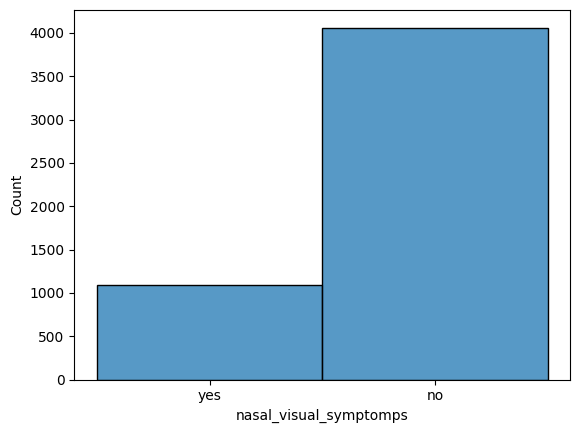

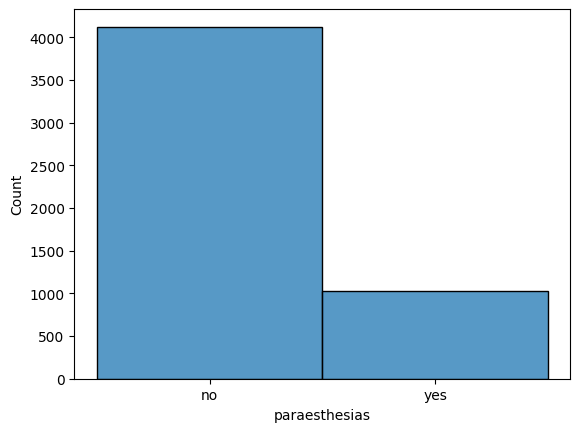

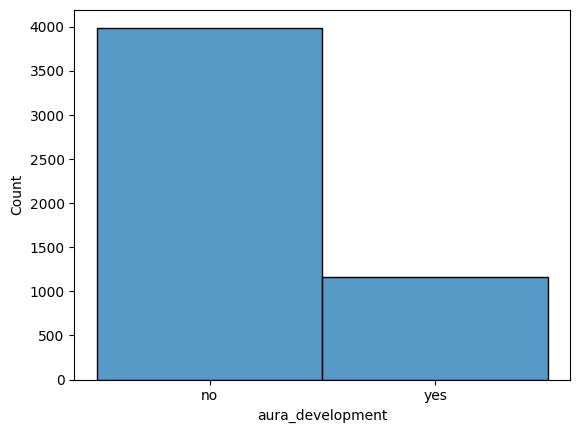

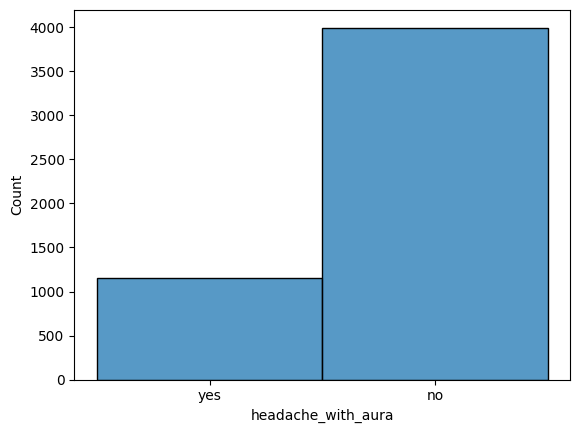

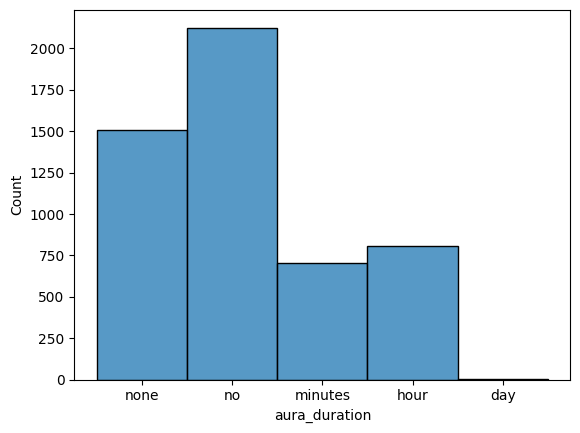

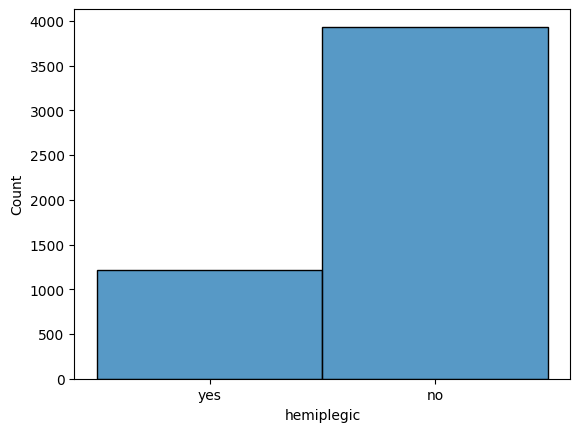

In [4]:
exclude = ['Count','previous_attacks']
for col in df:
    if col not in exclude:
        sns.histplot(data=df, x=df[col], discrete=True)
        plt.show()

------------------
Decision Trees

#### DT #1

Shape of X: (5150, 42)
Shape of y: (5150,)
Training accuracy: 1.0
Test accuracy    : 0.8330097087378641


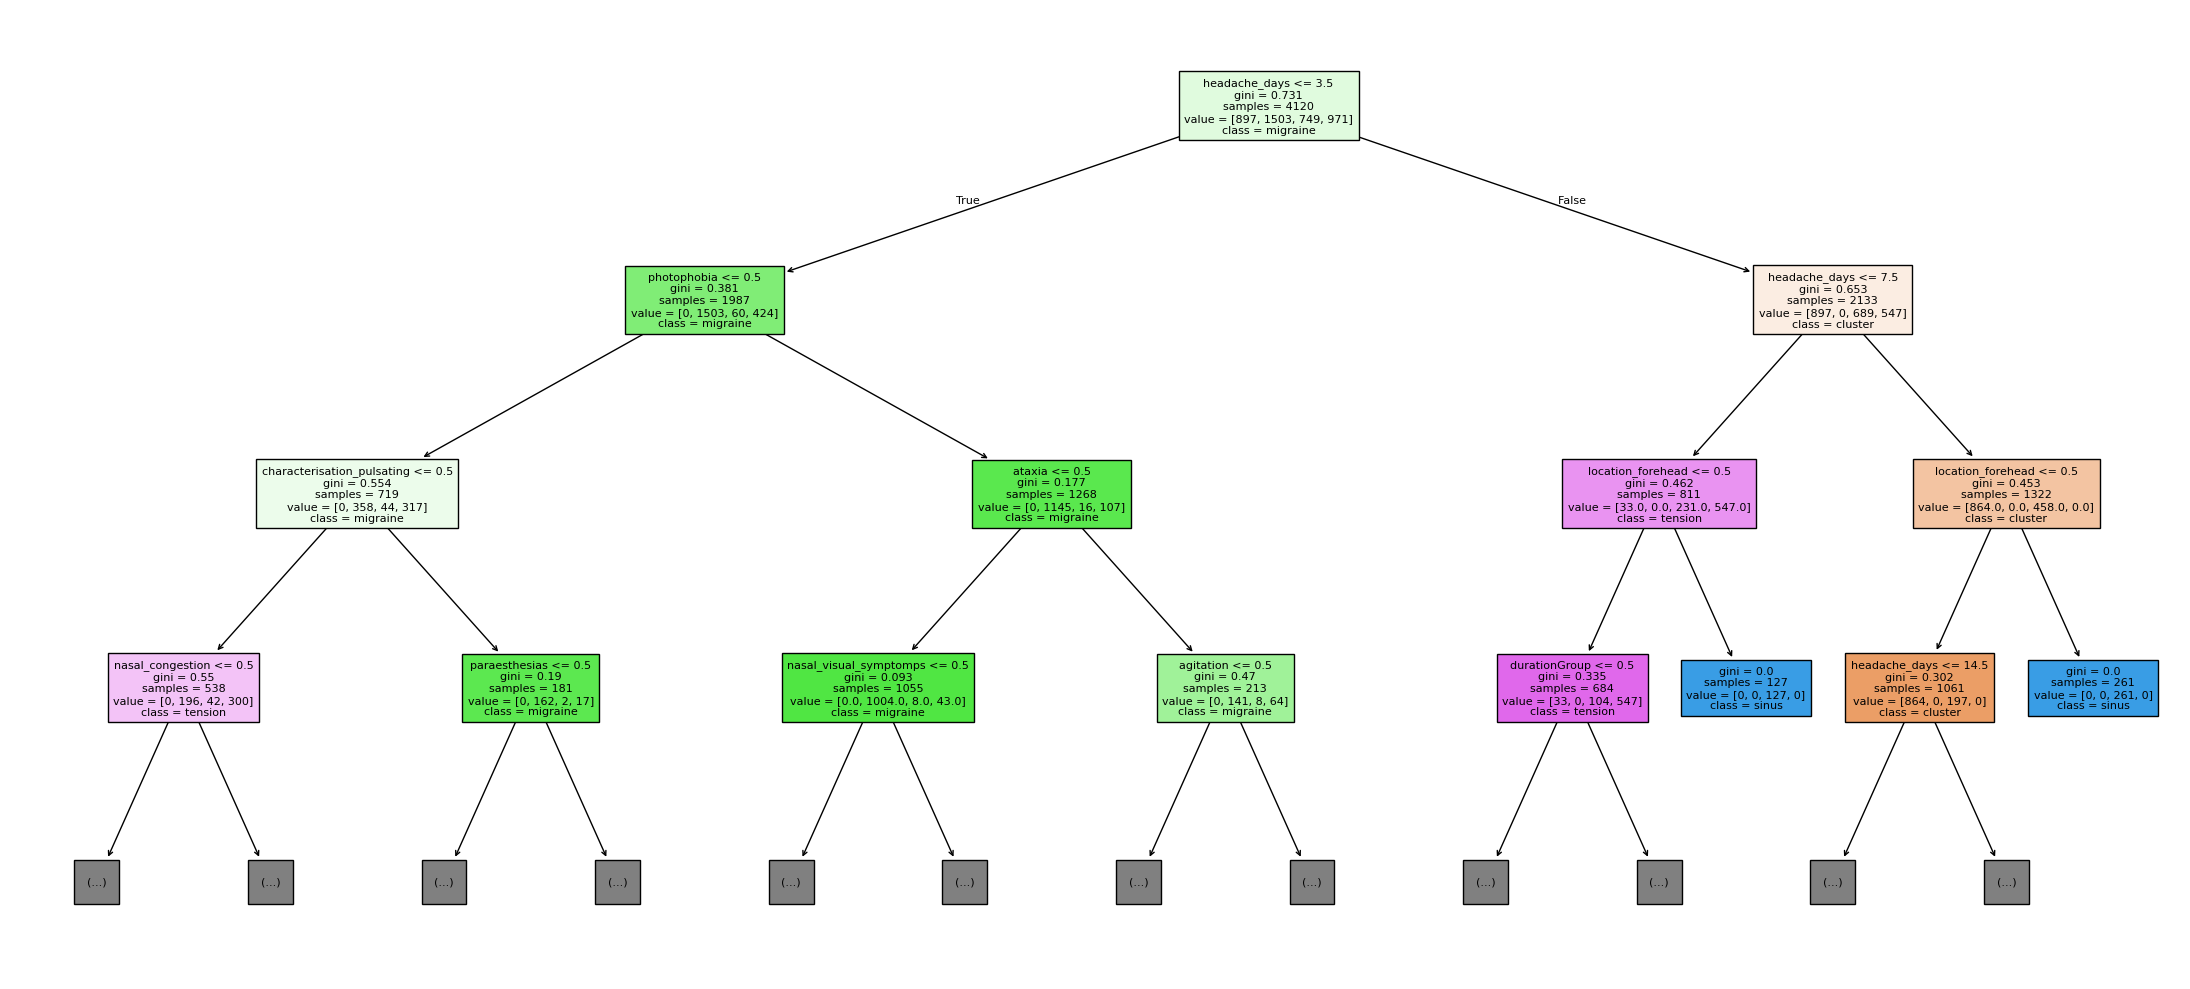

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# -------------------------------------------------------
# 1. Load the raw data from the CSV
# -------------------------------------------------------
headaches_raw = pd.read_csv("headaches.csv")

# If you have an ID / index column, list it here so it won't be used as a feature
columns_to_drop = ["Count",'previous_attacks']   # <- change or empty this list if needed

headaches_clean = headaches_raw.drop(columns=columns_to_drop)

# -------------------------------------------------------
# 2. Separate features + target column name
# -------------------------------------------------------
target_column = "CLASS"

# Work on a copy of the feature set so we don't touch the original
features_base = headaches_clean.copy()

# -------------------------------------------------------
# 3. Encode binary yes/no variables as 0/1
# -------------------------------------------------------
# Detect columns whose unique values are only "yes"/"no"
binary_columns = [
    col for col in features_base.columns
    if set(features_base[col].dropna().unique()) <= {"yes", "no"}
]

for col in binary_columns:
    features_base[col] = features_base[col].map({"no": 0, "yes": 1})

# -------------------------------------------------------
# 4. Encode ordinal categorical variables with an explicit order
#    (adjust the orders if your dataset uses different labels)
# -------------------------------------------------------
ordinal_orders = {
    "severity": ["mild", "moderate", "severe"],
    "durationGroup": ["M", "H", "F"],      # edit this order if needed
    "aura_duration": ["short", "medium", "long"],  # change to your real levels
}

features_ordinal = features_base.copy()

for col_name, ordered_levels in ordinal_orders.items():
    if col_name in features_ordinal.columns:
        cat_type = pd.CategoricalDtype(categories=ordered_levels, ordered=True)
        features_ordinal[col_name] = (
            features_ordinal[col_name]
            .astype(cat_type)
            .cat.codes
        )

# -------------------------------------------------------
# 5. One-hot encode nominal (unordered) categorical variables
#    (from your summary: location, characterisation)
# -------------------------------------------------------
nominal_columns = [c for c in ["location", "characterisation"]
                   if c in features_ordinal.columns]

headaches_encoded = pd.get_dummies(
    features_ordinal,
    columns=nominal_columns,
    drop_first=True   # avoids perfect multicollinearity
)

# -------------------------------------------------------
# 6. Final X (features) and y (target)
# -------------------------------------------------------
y = headaches_encoded[target_column]
X = headaches_encoded.drop(columns=[target_column])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# -------------------------------------------------------
# 7. Split into train and test sets
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y        # keeps class proportions similar in train/test
)

# -------------------------------------------------------
# 8. Fit a decision tree classifier
# -------------------------------------------------------
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

print("Training accuracy:", tree_model.score(X_train, y_train))
print("Test accuracy    :", tree_model.score(X_test, y_test))

# -------------------------------------------------------
# 9. Visualize a shallow version of the tree (top levels only)
# -------------------------------------------------------
plt.figure(figsize=(22, 10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    max_depth=3,     # show only first few levels so it’s readable
    fontsize=8
)
plt.tight_layout()
plt.show()


##### DT #2 with Entropy and IC added

Initially dropped columns: ['Count', 'previous_attacks']
Full feature set shape: (5150, 42)

Full model training accuracy: 1.000
Full model test accuracy     : 0.841


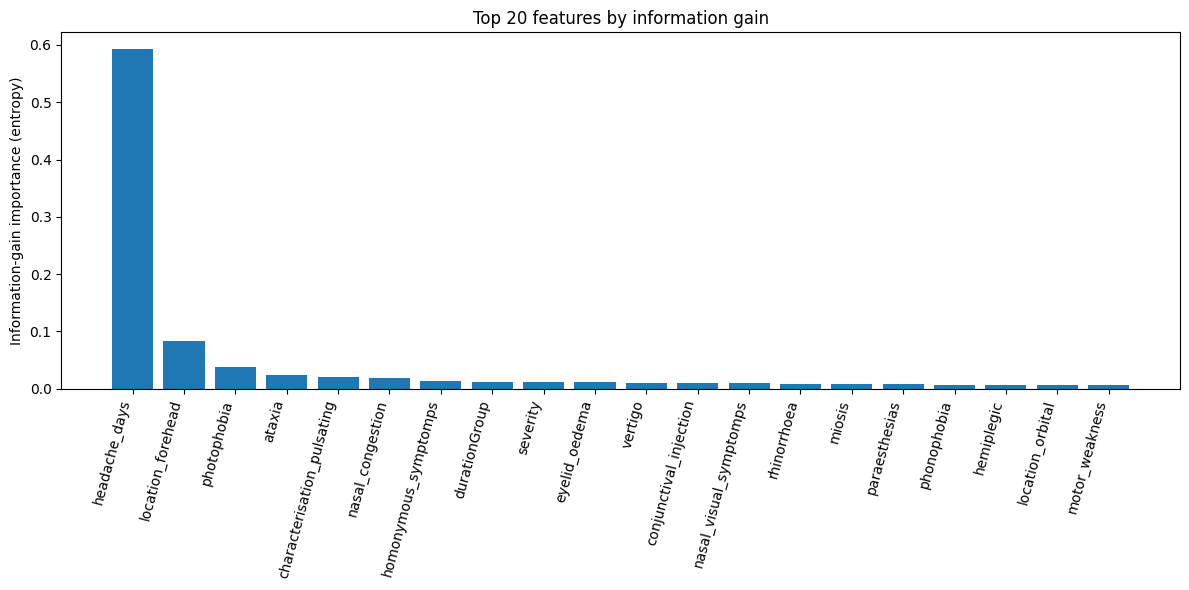


Number of features before trimming: 42
Number of features kept (above info threshold): 27
Number of features dropped: 15

Reduced model training accuracy: 1.000
Reduced model test accuracy    : 0.835

Features dropped due to low information gain:
  - aggravation
  - aura_development
  - aura_duration
  - characterisation_stabbing
  - characterisation_throbbing
  - decreased_consciousness
  - dysarthria
  - headache_with_aura
  - hypacusia
  - lacrimation
  - location_unilateral
  - pericranial
  - ptosis
  - speech_disturbance
  - tinnitus

Top 10 features by information gain:
                      feature  importance  cum_importance
0               headache_days    0.592425        0.592425
1           location_forehead    0.083030        0.675455
2                 photophobia    0.037227        0.712682
3                      ataxia    0.024030        0.736712
4  characterisation_pulsating    0.020704        0.757416
5            nasal_congestion    0.017889        0.775305
6        

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# -------------------------------------------------------
# 1. Load data and remove columns that must never be used
# -------------------------------------------------------
headaches_raw = pd.read_csv("headaches.csv")

# Explicitly exclude ID-like / undesired columns
columns_to_drop = ["Count", "previous_attacks"]  # <- per your instruction
existing_drop = [c for c in columns_to_drop if c in headaches_raw.columns]

headaches_clean = headaches_raw.drop(columns=existing_drop)

print("Initially dropped columns:", existing_drop)

# -------------------------------------------------------
# 2. Separate target from features
# -------------------------------------------------------
target_column = "CLASS"
features_base = headaches_clean.copy()

# -------------------------------------------------------
# 3. Convert binary yes/no variables to 0/1
# -------------------------------------------------------
binary_columns = [
    col for col in features_base.columns
    if set(features_base[col].dropna().unique()) <= {"yes", "no"}
]

for col in binary_columns:
    features_base[col] = features_base[col].map({"no": 0, "yes": 1})

# -------------------------------------------------------
# 4. Encode ordinal variables using an ordered mapping
#    (adjust the orders to match your real labels if needed)
# -------------------------------------------------------
ordinal_orders = {
    "severity": ["mild", "moderate", "severe"],
    "durationGroup": ["M", "H", "F"],              # edit if your order is different
    "aura_duration": ["short", "medium", "long"],  # change to match your dataset
}

features_ordinal = features_base.copy()

for col_name, ordered_levels in ordinal_orders.items():
    if col_name in features_ordinal.columns:
        ordered_cat = pd.CategoricalDtype(categories=ordered_levels, ordered=True)
        features_ordinal[col_name] = (
            features_ordinal[col_name]
            .astype(ordered_cat)
            .cat.codes
        )

# -------------------------------------------------------
# 5. One-hot encode nominal (unordered) categorical variables
#    (from your summary: "location", "characterisation")
# -------------------------------------------------------
nominal_columns = [c for c in ["location", "characterisation"]
                   if c in features_ordinal.columns]

headaches_encoded = pd.get_dummies(
    features_ordinal,
    columns=nominal_columns,
    drop_first=True
)

# -------------------------------------------------------
# 6. Final feature matrix X and target vector y
# -------------------------------------------------------
y_full = headaches_encoded[target_column]
X_full = headaches_encoded.drop(columns=[target_column])

print("Full feature set shape:", X_full.shape)

# -------------------------------------------------------
# 7. Train/test split
# -------------------------------------------------------
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full,
    y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

# -------------------------------------------------------
# 8. Train a decision tree with entropy (information gain)
# -------------------------------------------------------
tree_full = DecisionTreeClassifier(
    criterion="entropy",   # <- entropy-based information gain
    random_state=42
)
tree_full.fit(X_train_full, y_train_full)

train_acc_full = tree_full.score(X_train_full, y_train_full)
test_acc_full = tree_full.score(X_test_full, y_test_full)

print(f"\nFull model training accuracy: {train_acc_full:.3f}")
print(f"Full model test accuracy     : {test_acc_full:.3f}")

# -------------------------------------------------------
# 9. Compute and visualize feature importances (information gain)
# -------------------------------------------------------
importances = tree_full.feature_importances_
feature_names = X_full.columns

importance_df = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# Plot top N features for visual inspection
top_n = 20
top_features_df = importance_df.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_features_df["feature"], top_features_df["importance"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("Information-gain importance (entropy)")
plt.title(f"Top {top_n} features by information gain")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 10. Use a cumulative-importance threshold to trim low-value features
# -------------------------------------------------------
importance_df["cum_importance"] = importance_df["importance"].cumsum()

# Choose how much of the total importance you want to keep
# Example: keep features that together explain 95% of importance
cumulative_threshold = 0.95

important_mask = importance_df["cum_importance"] <= cumulative_threshold
kept_features = importance_df.loc[important_mask, "feature"].tolist()

# If nothing passes the threshold (e.g. weird distribution), fall back to top K
if len(kept_features) == 0:
    fallback_k = 15
    kept_features = importance_df.head(fallback_k)["feature"].tolist()
    print(
        f"\nNo features met the cumulative threshold; "
        f"falling back to top {fallback_k} features."
    )

dropped_features = sorted(set(X_full.columns) - set(kept_features))

print(f"\nNumber of features before trimming: {X_full.shape[1]}")
print(f"Number of features kept (above info threshold): {len(kept_features)}")
print(f"Number of features dropped: {len(dropped_features)}")

# -------------------------------------------------------
# 11. Train a new model on the reduced feature set
# -------------------------------------------------------
X_train_reduced = X_train_full[kept_features]
X_test_reduced = X_test_full[kept_features]

tree_reduced = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)
tree_reduced.fit(X_train_reduced, y_train_full)

train_acc_reduced = tree_reduced.score(X_train_reduced, y_train_full)
test_acc_reduced = tree_reduced.score(X_test_reduced, y_test_full)

print(f"\nReduced model training accuracy: {train_acc_reduced:.3f}")
print(f"Reduced model test accuracy    : {test_acc_reduced:.3f}")

# -------------------------------------------------------
# 12. Display which specific columns were removed
# -------------------------------------------------------
print("\nFeatures dropped due to low information gain:")
for feat in dropped_features:
    print("  -", feat)

# (Optional) quick view of the top of the importance table
print("\nTop 10 features by information gain:")
print(importance_df.head(10))


##### DT #3 with entropy and IC #2

Initially excluded: ['Count', 'previous_attacks']
Shape of full feature matrix: (5150, 42)

Full model accuracy:
  Training: 1.0
  Testing : 0.8407766990291262


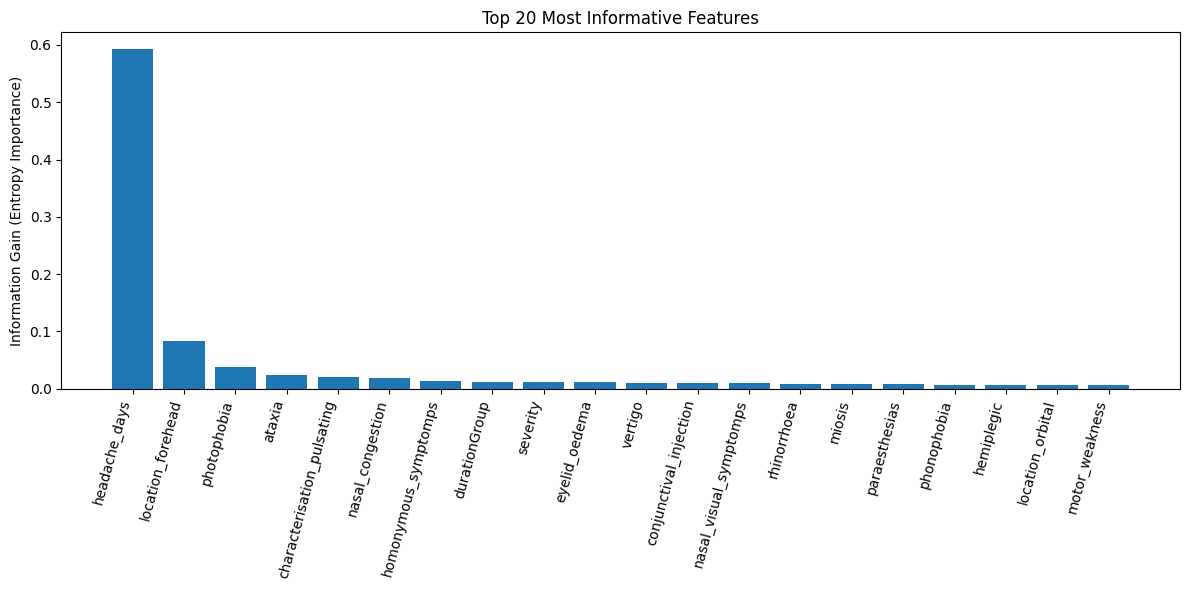


Feature trimming summary:
  Total features before: 42
  Features kept:         7
  Features dropped:      35

Dropped due to low information gain:
   - aggravation
   - agitation
   - aura_development
   - aura_duration
   - characterisation_stabbing
   - characterisation_throbbing
   - conjunctival_injection
   - decreased_consciousness
   - diplopia
   - durationGroup
   - dysarthria
   - eyelid_oedema
   - headache_with_aura
   - hemiplegic
   - hypacusia
   - lacrimation
   - location_orbital
   - location_unilateral
   - miosis
   - motor_weakness
   - nasal_visual_symptomps
   - nausea
   - paraesthesias
   - pericranial
   - phonophobia
   - ptosis
   - rhinorrhoea
   - sensory_symptomps
   - severity
   - speech_disturbance
   - sweating
   - tinnitus
   - vertigo
   - visual_symptomps
   - vomitting

Reduced model accuracy:
  Training: 0.9060679611650485
  Testing : 0.8669902912621359


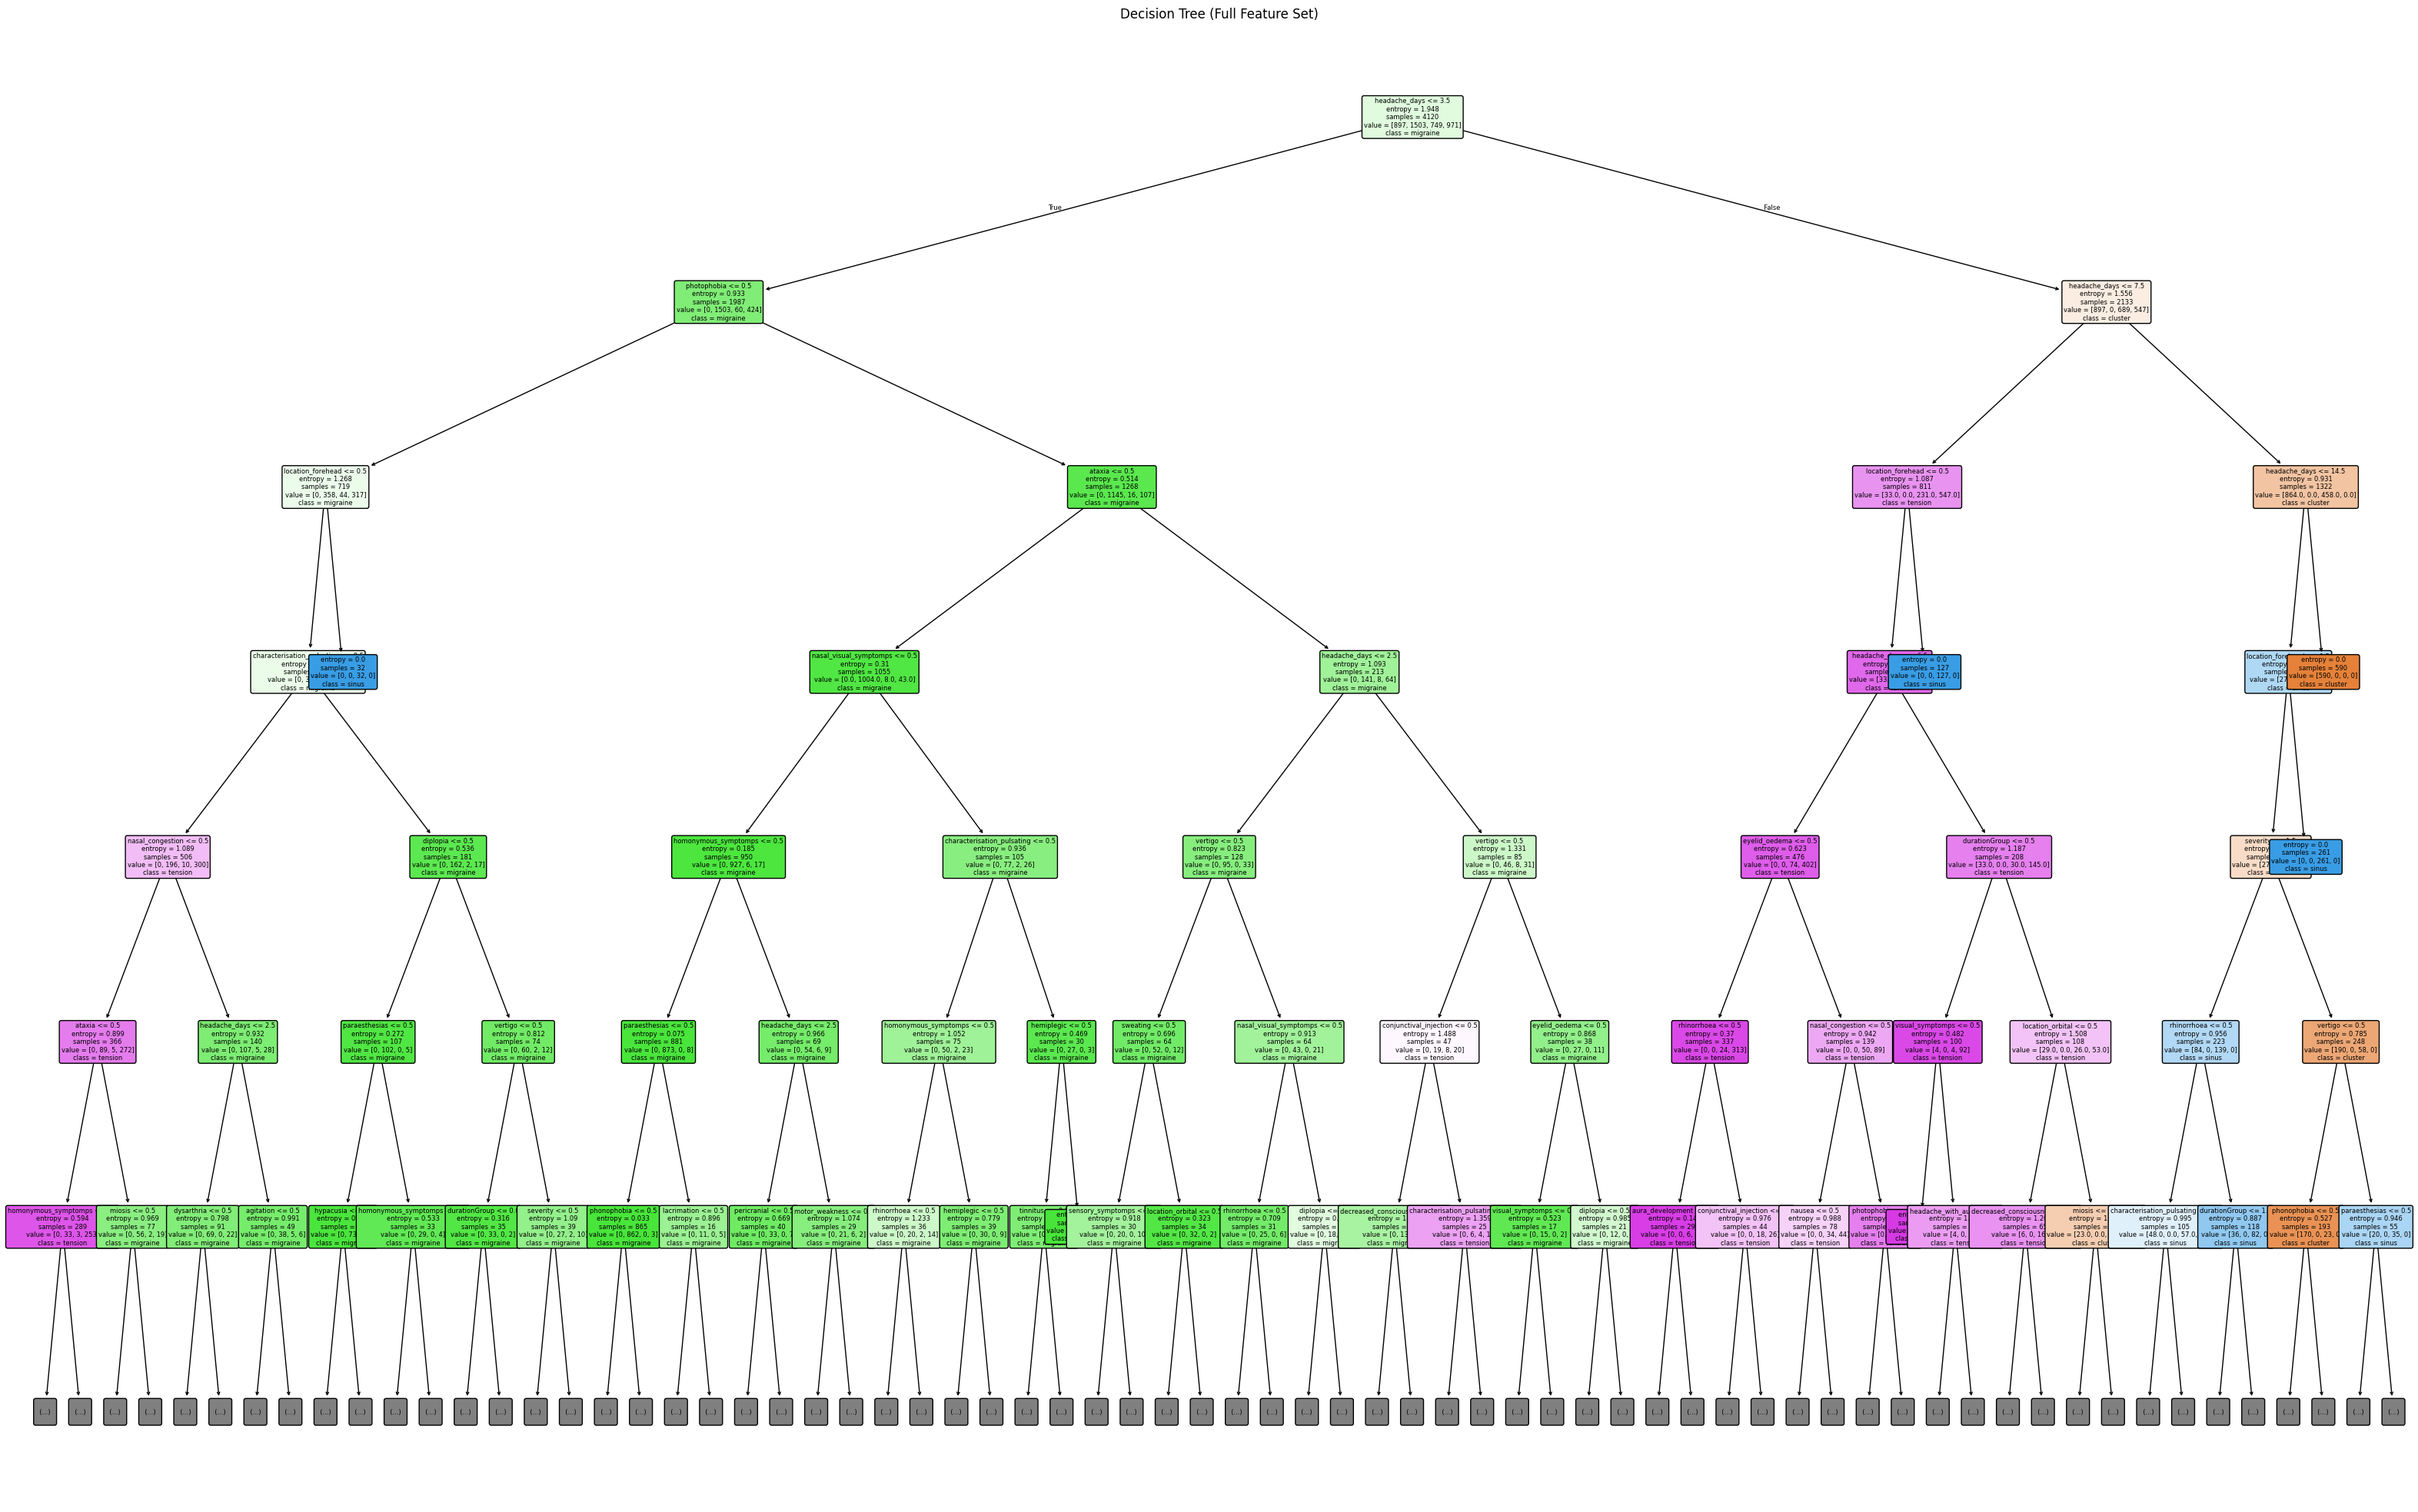

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# -------------------------------------------------------
# 1. Load data and explicitly remove unwanted columns
# -------------------------------------------------------
headache_raw = pd.read_csv("headaches.csv")

columns_to_exclude = ["Count", "previous_attacks"]
existing_exclusions = [c for c in columns_to_exclude if c in headache_raw.columns]

headache_base = headache_raw.drop(columns=existing_exclusions)
print("Initially excluded:", existing_exclusions)

# -------------------------------------------------------
# 2. Identify target and begin feature processing
# -------------------------------------------------------
target_name = "CLASS"
features_initial = headache_base.copy()

# -------------------------------------------------------
# 3. Convert yes/no binary variables to 0/1
# -------------------------------------------------------
binary_cols = [
    col for col in features_initial.columns
    if set(features_initial[col].dropna().unique()) <= {"yes", "no"}
]

for col in binary_cols:
    features_initial[col] = features_initial[col].map({"no": 0, "yes": 1})

# -------------------------------------------------------
# 4. Encode ordinal categorical variables
# -------------------------------------------------------
ordinal_mapping = {
    "severity": ["mild", "moderate", "severe"],
    "durationGroup": ["M", "H", "F"],  # adjust order if needed
    "aura_duration": ["short", "medium", "long"],  # adjust if needed
}

features_ordinal = features_initial.copy()

for col, order in ordinal_mapping.items():
    if col in features_ordinal.columns:
        dtype = pd.CategoricalDtype(categories=order, ordered=True)
        features_ordinal[col] = (
            features_ordinal[col]
            .astype(dtype)
            .cat.codes
        )

# -------------------------------------------------------
# 5. One-hot encode nominal (unordered) categorical variables
# -------------------------------------------------------
nominal_cols = [
    c for c in ["location", "characterisation"]
    if c in features_ordinal.columns
]

headache_encoded = pd.get_dummies(
    features_ordinal,
    columns=nominal_cols,
    drop_first=True
)

# -------------------------------------------------------
# 6. Final X and y
# -------------------------------------------------------
y_all = headache_encoded[target_name]
X_all = headache_encoded.drop(columns=[target_name])
print("Shape of full feature matrix:", X_all.shape)

# -------------------------------------------------------
# 7. Train/test split
# -------------------------------------------------------
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_all,
    y_all,
    test_size=0.20,
    random_state=42,
    stratify=y_all
)

# -------------------------------------------------------
# 8. Train the FULL entropy-based decision tree
# -------------------------------------------------------
tree_full = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)
tree_full.fit(X_train_full, y_train_full)

print("\nFull model accuracy:")
print("  Training:", tree_full.score(X_train_full, y_train_full))
print("  Testing :", tree_full.score(X_test_full, y_test_full))

# -------------------------------------------------------
# 9. Compute feature importances (information gain)
# -------------------------------------------------------
importance_scores = tree_full.feature_importances_
feature_list = X_all.columns

importance_table = (
    pd.DataFrame({"feature": feature_list, "importance": importance_scores})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# -------------------------------------------------------
# 10. Plot top 20 features by information gain
# -------------------------------------------------------
top_k = 20
plt.figure(figsize=(12, 6))
plt.bar(importance_table["feature"].head(top_k),
        importance_table["importance"].head(top_k))
plt.xticks(rotation=75, ha="right")
plt.ylabel("Information Gain (Entropy Importance)")
plt.title(f"Top {top_k} Most Informative Features")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 11. Select reduced feature set using cumulative importance
# -------------------------------------------------------
importance_table["cumulative"] = importance_table["importance"].cumsum()

threshold = 0.8  # keep features explaining x% of information gain
kept_mask = importance_table["cumulative"] <= threshold
kept_features = importance_table.loc[kept_mask, "feature"].tolist()

# Safety fallback if threshold keeps too few
if len(kept_features) < 5:
    kept_features = importance_table["feature"].head(15).tolist()

dropped_features = sorted(set(X_all.columns) - set(kept_features))

print(f"\nFeature trimming summary:")
print(f"  Total features before: {X_all.shape[1]}")
print(f"  Features kept:         {len(kept_features)}")
print(f"  Features dropped:      {len(dropped_features)}")

print("\nDropped due to low information gain:")
for feat in dropped_features:
    print("   -", feat)

# -------------------------------------------------------
# 12. Train REDUCED model using trimmed subset
# -------------------------------------------------------
X_train_reduced = X_train_full[kept_features]
X_test_reduced = X_test_full[kept_features]

tree_reduced = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)
tree_reduced.fit(X_train_reduced, y_train_full)

print("\nReduced model accuracy:")
print("  Training:", tree_reduced.score(X_train_reduced, y_train_full))
print("  Testing :", tree_reduced.score(X_test_reduced, y_test_full))

# -------------------------------------------------------
# OPTIONAL: Plot the Full Model Tree (can be huge)
# -------------------------------------------------------
plt.figure(figsize=(40, 25))
plot_tree(
    tree_full,
    feature_names=X_all.columns,
    class_names=[str(c) for c in sorted(y_all.unique())],
    filled=True,
    rounded=True,
    fontsize=6,
    max_depth=6
 )
plt.title("Decision Tree (Full Feature Set)")
plt.show()
